In [34]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract

In [33]:
!pip install pytesseract

  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [41]:
raw_dir = 'Y:/Internship/SoMin/Notebook/raw/Image'
def text_area1(source):
    image = cv2.imread(f'{raw_dir}/{source}.png')
    print(plt.imshow(image))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print(plt.imshow(gray))
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,3)
    print(plt.imshow(thresh))
    mask = thresh.copy()
    mask = cv2.merge([mask,mask,mask])
    print(plt.imshow(mask))
    
    picture_threshold = image.shape[0] * image.shape[1] * .01
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < picture_threshold:
            cv2.drawContours(mask, [c], -1, (0,0,0), -1)

    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    result = cv2.bitwise_xor(thresh, mask)

    text_pixels = cv2.countNonZero(result)
    percentage = (text_pixels / (image.shape[0] * image.shape[1])) * 100
    print('Percentage: {:.2f}%'.format(percentage))
    print(plt.imshow(result))

In [45]:
source = '123289566385862'

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
Percentage: 6.94%
AxesImage(54,36;334.8x217.44)


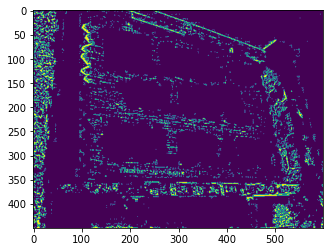

In [46]:
text_area1(source)

In [35]:
def text_area2(source): 
    image = cv2.imread(f'{raw_dir}/{source}.png')
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 0, 218])
    upper = np.array([157, 54, 255])
    mask = cv2.inRange(hsv, lower, upper)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
    dilate = cv2.dilate(mask, kernel, iterations=5)
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        ar = w / float(h)
        if ar < 5:
            cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

    # Bitwise dilated image with mask, invert, then OCR
    result = 255 - cv2.bitwise_and(dilate, mask)
    data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
#     print(data)

    plt.imshow('mask', mask)
    ptlt.imshow('dilate', dilate)
    plt.imshow('result', result)
    cv2.waitKey()

In [9]:
source = '183500673520372'

In [36]:
text_area2(source)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

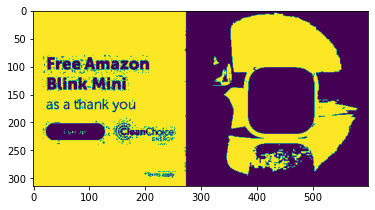

In [19]:
image = cv2.imread(f'{raw_dir}/{source}.png')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([0, 0, 218])
upper = np.array([157, 54, 255])
mask = cv2.inRange(hsv, lower, upper)
plt.imshow(mask)

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
dilate = cv2.dilate(mask, kernel, iterations=5)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ar = w / float(h)
    if ar < 5:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

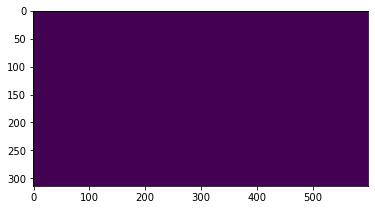

In [21]:
result = 255 - cv2.bitwise_and(dilate, mask)
plt.imshow(result)

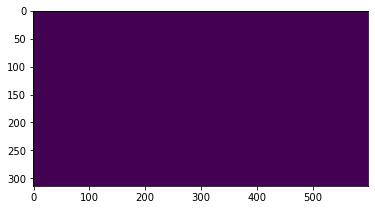

In [22]:
plt.imshow(dilate)


In [ ]:
text_area1('183500673520372')

Percentage: 8.25%


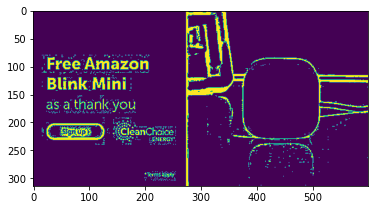

In [23]:
image = cv2.imread(f'{raw_dir}/183500673520372.png')
plt.imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,3)
plt.imshow(thresh)
mask = thresh.copy()
mask = cv2.merge([mask,mask,mask])
plt.imshow(mask)
picture_threshold = image.shape[0] * image.shape[1] * .05
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < picture_threshold:
        cv2.drawContours(mask, [c], -1, (0,0,0), -1)

mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
result = cv2.bitwise_xor(thresh, mask)

text_pixels = cv2.countNonZero(result)
percentage = (text_pixels / (image.shape[0] * image.shape[1])) * 100
print('Percentage: {:.2f}%'.format(percentage))
plt.imshow(result)

In [24]:
!pip install imutils


  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25862 sha256=e4fc31bcea6814b04fc3c58fb5a86d2f3a1eea51a4b988ed60906058b7f53877
  Stored in directory: c:\users\root\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [25]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

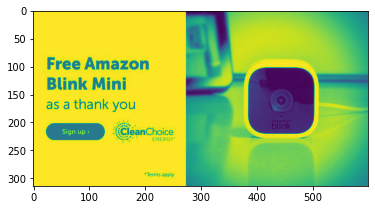

In [26]:
plt.imshow(gray)

In [27]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [28]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

In [29]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

In [30]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

In [31]:
im2 = img.copy()

NameError: name 'img' is not defined